In [1]:
"""
        EE2703 Applied Programming Lab - 2022
        End Semester Examination
        Done by: Ishaan Agarwal
        Roll Number: EE20B046
        Date: 12th May, 2022
"""

'\n        EE2703 Applied Programming Lab - 2022\n        End Semester Examination\n        Done by: Ishaan Agarwal\n        Roll Number: EE20B046\n        Date: 12th May, 2022\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#defining the constants

#independent parameters
l = 0.5 #quarter wavelength
c = 2.9979e8 #speed of light
mu0 = 4*np.pi*1e-7 #permeability of free space
N = 4 #Number of sections in each half section of the antenna
Im = 1 #current injected into the antenna
a = 0.01 #radius of the wire

#dependent parameters
lamda = l*4 #wavelength 
f = c/lamda #frequency
k = 2*np.pi/lamda #wave number
dz = l/N #spacing of the elements



In [4]:
#Question 1
z = np.zeros(2*N+1)
z = np.linspace(-l, l, 2 * N + 1) #creating the array of z and dropping certain values to obtain the array of u
#drop first and last element and middle element of u (known values)
u = np.delete(z, [0, N, -1])

#constructing current vectors (theoretical)
I = Im * np.sin((2 * np.pi / lamda) * (l - abs(z)))  # current vector
I[N] = Im #current injected into the middle element
I[0] = 0 #boundary condition
I[-1] = 0 #boundary condition
#form J by deleting first, last and middle element of I
J = np.delete(I, [0, N, -1])




In [5]:
#Question 2
#creating M matrix which is 1/(2*pi*a) * Identity matrix (dimension = 2*N-2)
def compute_M(N, a):
    M = np.identity(2*N-2)*(1/(2*np.pi*a))
    return M
M = compute_M(N, a)


In [6]:
#Question 3
#computing Rz and Ru
#Rz computes distances including distances to known currents whereas Ru computes distances for only unknown currents
def compute_Rz(z, z_dash):
    return np.sqrt((z-z_dash)**2 + a**2)
def compute_Ru(u, u_dash):
    return np.sqrt((u-u_dash)**2 + a**2)

Rz = compute_Rz(u, z.reshape(-1,1))
Ru = compute_Ru(u, u.reshape(-1,1))

In [7]:
#computing P and Pb
def compute_P(Ru):
    return (mu0/(4*np.pi)) * np.exp(-1j*k*Ru) * (1/Ru) * dz
def compute_Pb(RiN):
    return (mu0/(4*np.pi)) * np.exp(-1j*k*RiN) * (1/RiN) * dz

P = compute_P(Ru)
Pb = compute_Pb(Rz[N,:])


In [8]:
#Question 4
#computing Qij and Qb
def compute_Qij(Ru, P):
    return -P * (a / mu0) * (complex(0, -k) / Ru - 1 / Ru**2)
def compute_QB(Pb, RiN):
    return -Pb * a / mu0 * ((-1j * k) / RiN - 1 / (RiN**2))

Qij = compute_Qij(Ru, P)
Qb = compute_QB(Pb, Rz[N,:])
Qb = Qb.reshape(-1,1)

In [9]:
#Question 5
#finding J_calculated and I_calculated
J_calculated = (np.linalg.inv(M-Qij).dot(Qb*Im)).T[0] #obtained was an array of array, thus taking the first element of the array
I_calculated = np.concatenate(([0], J_calculated[:N-1], [Im], J_calculated[N-1:], [0])) 




/Users/ishaan/Desktop/EE2703 - Applied Programming Lab/EndSem/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


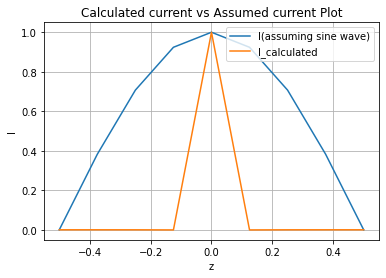

In [10]:
#plotting I and I_calculated on the same graph
plt.plot(z, I, label = 'I(assuming sine wave)')
plt.plot(z, I_calculated, label = 'I_calculated')
plt.title('Calculated current vs Assumed current Plot')
plt.grid()
plt.xlabel('z')
plt.ylabel('I')
plt.legend(loc = 'upper right')
plt.show()


In [11]:
#printing all values for N=4
print('\n')
print('N = 4')
print('\n')
print('z = ', z.round(2))
print('\n')
print('u = ', u.round(2))
print('\n')
print('M = ', M.round(2))
print('\n')
print('Rz = ', Rz.round(2))
print('\n')
print('Ru = ', Ru.round(2))
print('\n')
print('RiN = ', Rz[N,:].round(2))
print('\n')
print('P = ', (P*1e8).round(2))
print('\n')
print('Pb = ', (Pb*1e8).round(2))
print('\n')
print('Qij = ', Qij.round(2))
print('\n')
print('Qb = ', Qb.round(2))
print('\n')
print('J_calculated = ', J_calculated.round(6))
print('\n')
print('I_calculated = ', I_calculated.round(6))
print('\n')





N = 4


z =  [-0.5  -0.38 -0.25 -0.12  0.    0.12  0.25  0.38  0.5 ]


u =  [-0.38 -0.25 -0.12  0.12  0.25  0.38]


M =  [[15.92  0.    0.    0.    0.    0.  ]
 [ 0.   15.92  0.    0.    0.    0.  ]
 [ 0.    0.   15.92  0.    0.    0.  ]
 [ 0.    0.    0.   15.92  0.    0.  ]
 [ 0.    0.    0.    0.   15.92  0.  ]
 [ 0.    0.    0.    0.    0.   15.92]]


Rz =  [[0.13 0.25 0.38 0.63 0.75 0.88]
 [0.01 0.13 0.25 0.5  0.63 0.75]
 [0.13 0.01 0.13 0.38 0.5  0.63]
 [0.25 0.13 0.01 0.25 0.38 0.5 ]
 [0.38 0.25 0.13 0.13 0.25 0.38]
 [0.5  0.38 0.25 0.01 0.13 0.25]
 [0.63 0.5  0.38 0.13 0.01 0.13]
 [0.75 0.63 0.5  0.25 0.13 0.01]
 [0.88 0.75 0.63 0.38 0.25 0.13]]


Ru =  [[0.01 0.13 0.25 0.5  0.63 0.75]
 [0.13 0.01 0.13 0.38 0.5  0.63]
 [0.25 0.13 0.01 0.25 0.38 0.5 ]
 [0.5  0.38 0.25 0.01 0.13 0.25]
 [0.63 0.5  0.38 0.13 0.01 0.13]
 [0.75 0.63 0.5  0.25 0.13 0.01]]


RiN =  [0.38 0.25 0.13 0.13 0.25 0.38]


P =  [[124.94-3.93j   9.2 -3.83j   3.53-3.53j  -0.  -2.5j   -0.77-1.85j
   -1.18-1.18j